# Linear regression

Or how to weight the explaining variables to fit to the variable of interest

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# statistician world regression
import statsmodels.api as sm

# Machine Learning (aka ML in my notebooks, sorry for the abbreviations) regrssion
from sklearn.linear_model import LinearRegression

# to split into training (learning part of the dataset) and test (testing part of the dataset)
from sklearn.model_selection import train_test_split

### Dataset

In [2]:
happy = pd.read_csv("./data/happiness.csv", usecols=[1,2,3])
happy.head()

,happy,temp,fish
0,0.484098,3.796804,0.977109
1,4.441049,-3.974861,5.420305
2,2.341838,2.217617,2.201627
3,3.456520,-5.435268,1.140884
4,3.846523,-3.710603,4.864311


In [3]:
#dependent variable
y = happy['happy']

# explaining variables
X = happy[['temp', 'fish']]
# add constant adds good propeties to the model
X = sm.add_constant(X)

# _train related to the training set, _test to the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Package statmodels

From the statistician world (i.e. a lot of methods to describe the data, but not robust with some datasets)

The regression relies on three hypothesis:
- The residuals are centered
- The residuals are independent
- The residuals follow a normal law (same variance for all residuals)

In [4]:
model = sm.OLS(y_train, X_train)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  happy   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     303.1
Date:                Thu, 14 May 2020   Prob (F-statistic):           9.69e-70
Time:                        09:54:32   Log-Likelihood:                -336.65
No. Observations:                 273   AIC:                             679.3
Df Residuals:                     270   BIC:                             690.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1130      0.096     11.627      0.000       0.925       1.301
temp          -0.0588      0.009     -6.658      0.000      -0.076      -0.041
fish           0.5763      0.033     17.426      0.000       0.511       0.641
==============================================================================
Omnibus:                        2.413   Durbin-Watson:                   2.272
Prob(Omnibus):                  0.299   Jarque-Bera (JB):                2.123
Skew:                           0.203   Prob(JB):                        0.346
Kurtosis:                       3.145   Cond. No.                         13.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With:
- Dep variable the dependent variable
- Model: Ordinary Least Square (Mean Squared Error as metric)
- Method : in ML world metric
- [...]
- Df = degree of freedom
- <b>R-squared</b> is a mesure of how the model fits to the dependent variable (1 is a perfect match, 0 a bad result)
- Adjusted R-squared is a mesure of R-quared penalized to drop with the increase of the number of independent variables
- F statistic measures the statistic relative to the Fisher test => global validity of the model, with the null hypothesis (H0) all the coefficients are equals to 0
- Prob F returns the related p-value, in this case with a threshold of 0.05, we reject the null hypothesis
- Log-likelihood (see -2LL in the literature) measures how much the model explains the variation of the dependent variable. Low = great model.
- Akaike Information Criterion (AIC) and Bayesian information criterion (BIC) measures a trade-off between the number of ind. vars used in the model and the accuracy of this model. Honestly, I never interpret this coefs, it's a feeling (in general, you feel it when you use too much variables to obtain a poor model)
- Cov matrix (coming fom covariance matrix, between the different explaining variables). You have coeff = X(X'X)^(⁻1)X'y. Invert the matrix in the middle (X'X =/= cov) sometimes leads to failure, because you divide it by det(M), where det is the determinant of the matrix. And if you have a lot of correlated variables in your X matrix, you may have det(X'X) low or equal to 0 (if two columns are correlated, O is a proper value of M, and det is the product of all proper values); when you divide by it, you don't want it to be close to 0 :)
- <b>The coefficient analysis table</b> (in the middle); for each explaining variables, we compute the coefficient (i.e. the weight you attribute to the variable), the standard deviation of the estimation of this coefficient (you want it to be low), the T-test (Student) statistic, where you test if your coefficient is equal to 0 (null hypothesis = my coef is 0), the p value of this test, and the confidence interval of the coef (if you want to interpret the value of a coefficient, the interval should not contain both positive and negative values).
- Bench of advanced tests after that; there are only important for advanced users in my opinion.
- Omnibus measures the ratio unexplained variance VS explained variance (i.e. explained by the model), null hypothesis = the model does not fit the data
- Prob the related p-val
- Skew measures the assymetry of residuals (should be centered in theory, in the supposed hypothesis)
- Kurtosis measures how the tail of distribution fits to a normal distribution
- Durbin Watson measures the autocorrelation of residuals (= errors). You don't want to find some link between your errors, that would means they are not independent.
- Jarque Bera is a normality test applied to the residuals (as shapiro, but it implies to compare the head and tails of ditribution, which are often the problem of real distribution when we want to compare them to similar normal distribution)
- Prob the related p-val

Essential values to check are highlighted in <b>bold</b>.

Mean Squared Error : 0.5238890415609954


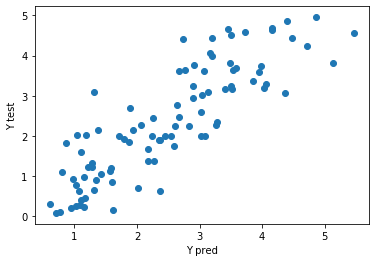

In [5]:
#our predictions
y_pred = model.predict(X_test)
#y_pred = 1.0722-0.0492*X_test["temp"]+0.6051*X_test["fish"] in my current launch
# I don't want to include a random seed in the notebook (i.e. a different launch = same result), 
# so it will change a bit

print("Mean Squared Error : "+str(np.mean((y_pred-y_test)**2)))

plt.scatter(y_pred, y_test)
plt.ylabel("Y test")
plt.xlabel("Y pred")
plt.show()

### Package Scikit-learn

Simple and efficient, use it instead of OLS

In [6]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

Simple, but you have to look and study carefully the results. There is a compromise to find between knowing all the above metrics and just launch the last cell :)

Coeff : [ 0.         -0.05882225  0.57627297]
R2 score : 0.7231383090665641
MSE : 0.5238890415609951


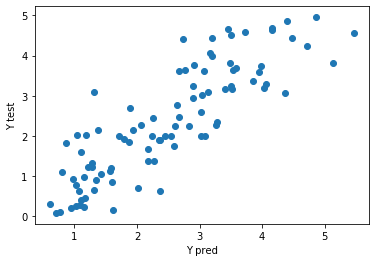

In [7]:
print("Coeff : "+str(lin_reg.coef_))
print("R2 score : "+str(lin_reg.score(X_test, y_test)))
print("MSE : "+str(np.mean((y_pred-y_test)**2)))
# similar coefs and MSE

plt.scatter(y_pred, y_test)
plt.ylabel("Y test")
plt.xlabel("Y pred")
plt.show()

You also have a scipy function linregress to do linear regression

### Some problems you can meet

- Leverage values -> a point far from the average values of distribution in term of X, that can highly change the slope of the regression -> see cook's distance
- Abberant values -> a point far from the average values of distribution in term of y, that can highly change the result, to drop and study apart -> see studentized residuals

### Some possible improvements for linear reg
- Cut the dataset in interval of X, and do a regression for each interval, piecewise regression
- Instead of selecting all the variables, do a feature selection with stepwise (combination of forward and backward, but seems to be a bad practice in the literature. To be fair, they didn't provide a lot of alternative!)

You can do classification with logistic regression, by applying a logisic activation (i.e. compose your result by a logistic function).